In [1]:
# Data preprocessing

import csv
from hypothesis_test import *
from kardis_test import *
from mg_calculator import *
from q_finder import *
from graph_distributions import *

"""----------------------------------------Process Priors Data--------------------------------------------------"""
#0 denotes no priors. le5 denotes greater than 0 but less than equal to 5 priors. gt5 denotes greater than 5 priors
#Priors = 0 

file = open(r"Datasets/compas-scores-two-years.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

priors_0_ids = [int(id[x]) for x in range(len(id)) if days_b_screening_arrest[x] != '' and int(days_b_screening_arrest[x]) <= 30 and 
              int(days_b_screening_arrest[x]) >= -30 and int(is_recid[x]) != -1 and
              int(priors_count[x]) == 0 and score_text[x] != 'N/A']

idx = 0
priors_0_scores = []
for x in range(len(id)):
    if idx < len(priors_0_ids):
        if int(id[x]) == priors_0_ids[idx]:
            priors_0_scores.append(score_text[x])
            idx += 1
    else:
        break

idx = 0
priors_0_races = []
for x in range(len(id)):
    if idx < len(priors_0_ids):
        if int(id[x]) == priors_0_ids[idx]:
            priors_0_races.append(race[x])
            idx += 1
    else:
        break


priors_le5_ids = [int(id[x]) for x in range(len(id)) if days_b_screening_arrest[x] != '' and int(days_b_screening_arrest[x]) <= 30 and 
              int(days_b_screening_arrest[x]) >= -30 and int(is_recid[x]) != -1 and
              int(priors_count[x]) > 0 and int(priors_count[x]) <= 5 and score_text[x] != 'N/A']

idx = 0
priors_le5_scores = []
for x in range(len(id)):
    if idx < len(priors_le5_ids):
        if int(id[x]) == priors_le5_ids[idx]:
            priors_le5_scores.append(score_text[x])
            idx += 1
    else:
        break

idx = 0
priors_le5_races = []
for x in range(len(id)):
    if idx < len(priors_le5_ids):
        if int(id[x]) == priors_le5_ids[idx]:
            priors_le5_races.append(race[x])
            idx += 1
    else:
        break

priors_gt5_ids = [int(id[x]) for x in range(len(id)) if days_b_screening_arrest[x] != '' and int(days_b_screening_arrest[x]) <= 30 and 
              int(days_b_screening_arrest[x]) >= -30 and int(is_recid[x]) != -1 and
              int(priors_count[x]) > 5 and score_text[x] != 'N/A']

idx = 0
priors_gt5_scores = []
for x in range(len(id)):
    if idx < len(priors_gt5_ids):
        if int(id[x]) == priors_gt5_ids[idx]:
            priors_gt5_scores.append(score_text[x])
            idx += 1
    else:
        break

idx = 0
priors_gt5_races = []
for x in range(len(id)):
    if idx < len(priors_gt5_ids):
        if int(id[x]) == priors_gt5_ids[idx]:
            priors_gt5_races.append(race[x])
            idx += 1
    else:
        break



Null hypothesis (proposed distribution): [0.058465286236297195, 0.15834348355663824, 0.7831912302070646]

Proposed distribution rejected at alpha = 0.05. Kardis = 1.09980705806487e-21.
Any plausible distribution must boost probability over the given distribution by 4.54625196604721e+19, and will therefore have a minimum probability of 1.12630441817801e-8.
Closest plausible distribution: [0.09391609066763879, 0.20239379996321968, 0.7036901093691414]


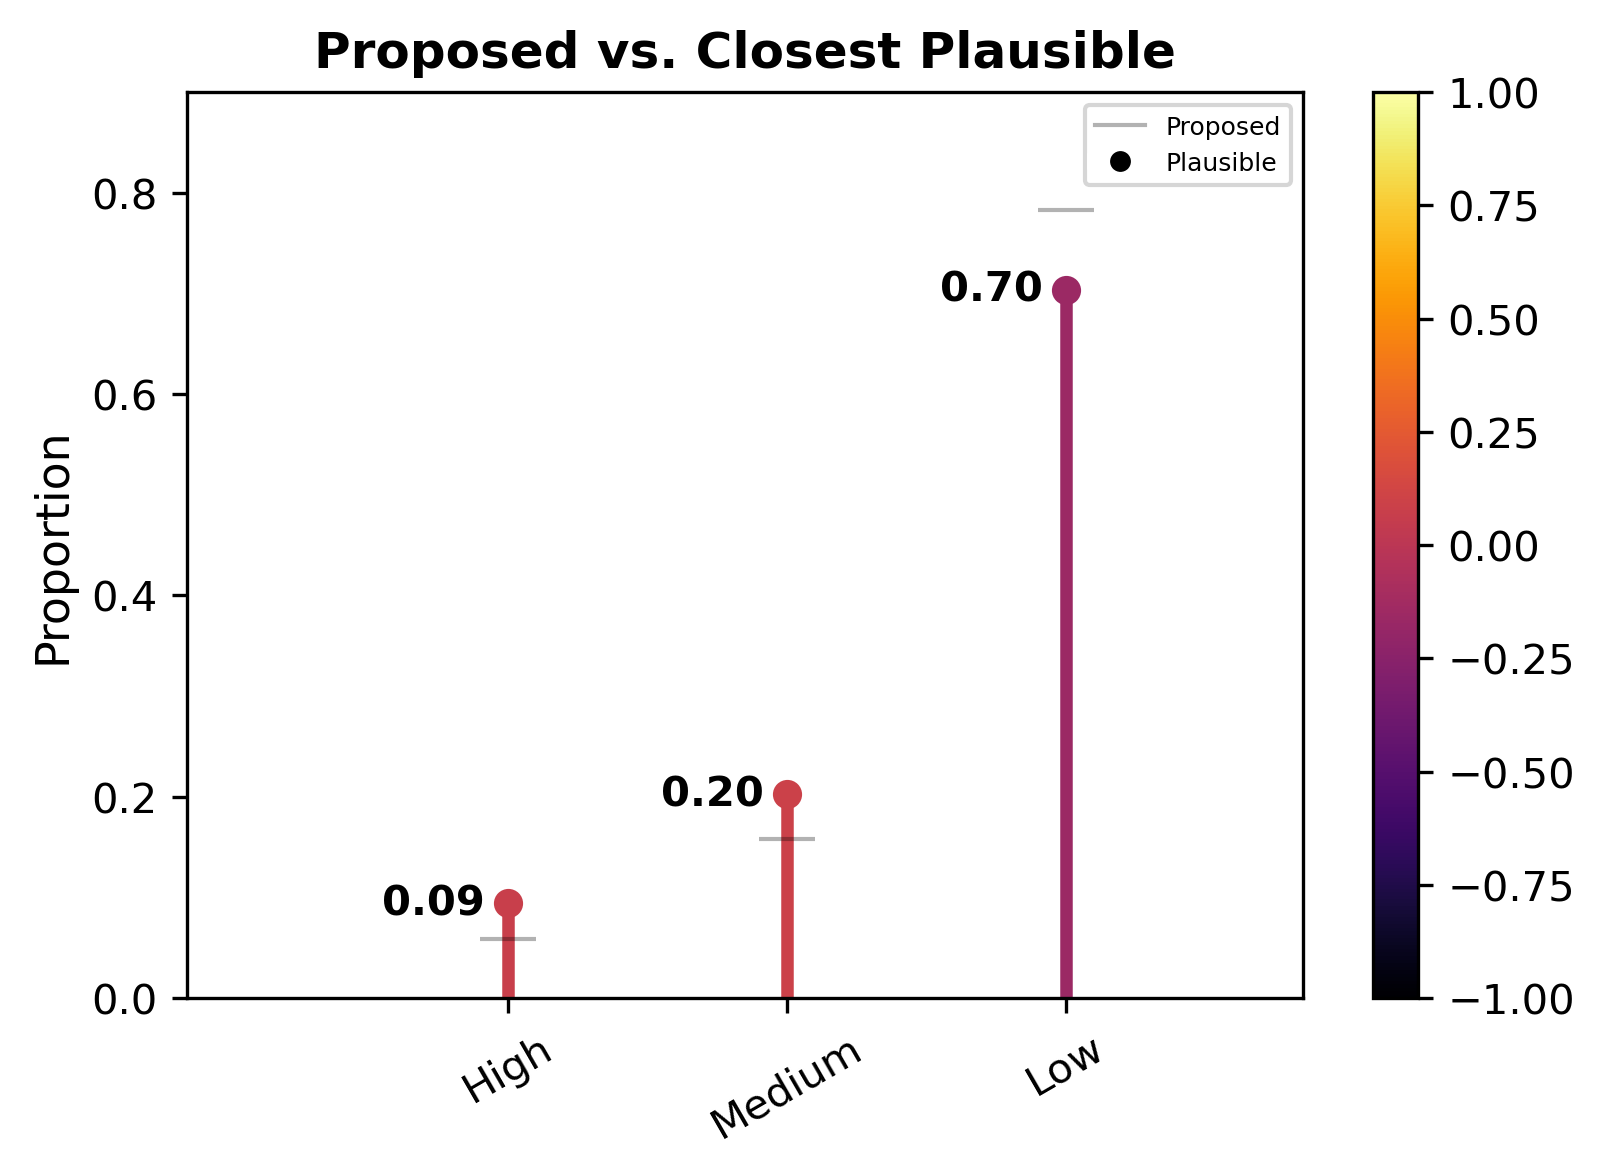

<Figure size 432x288 with 0 Axes>

In [5]:
#0 Priors Test
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(priors_0_races,priors_0_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]
AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")

q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_0priors_white_dist.pdf")

Null hypothesis (proposed distribution): [0.095703125, 0.2431640625, 0.6611328125]

Proposed distribution rejected at alpha = 0.05. Kardis = 9.77263217943899e-58.
Any plausible distribution must boost probability over the given distribution by 5.11632885408262e+55, and will therefore have a minimum probability of 3.84153120907729e-9.
Closest plausible distribution: [0.17174006260348695, 0.30440336057406053, 0.5238565768224526]


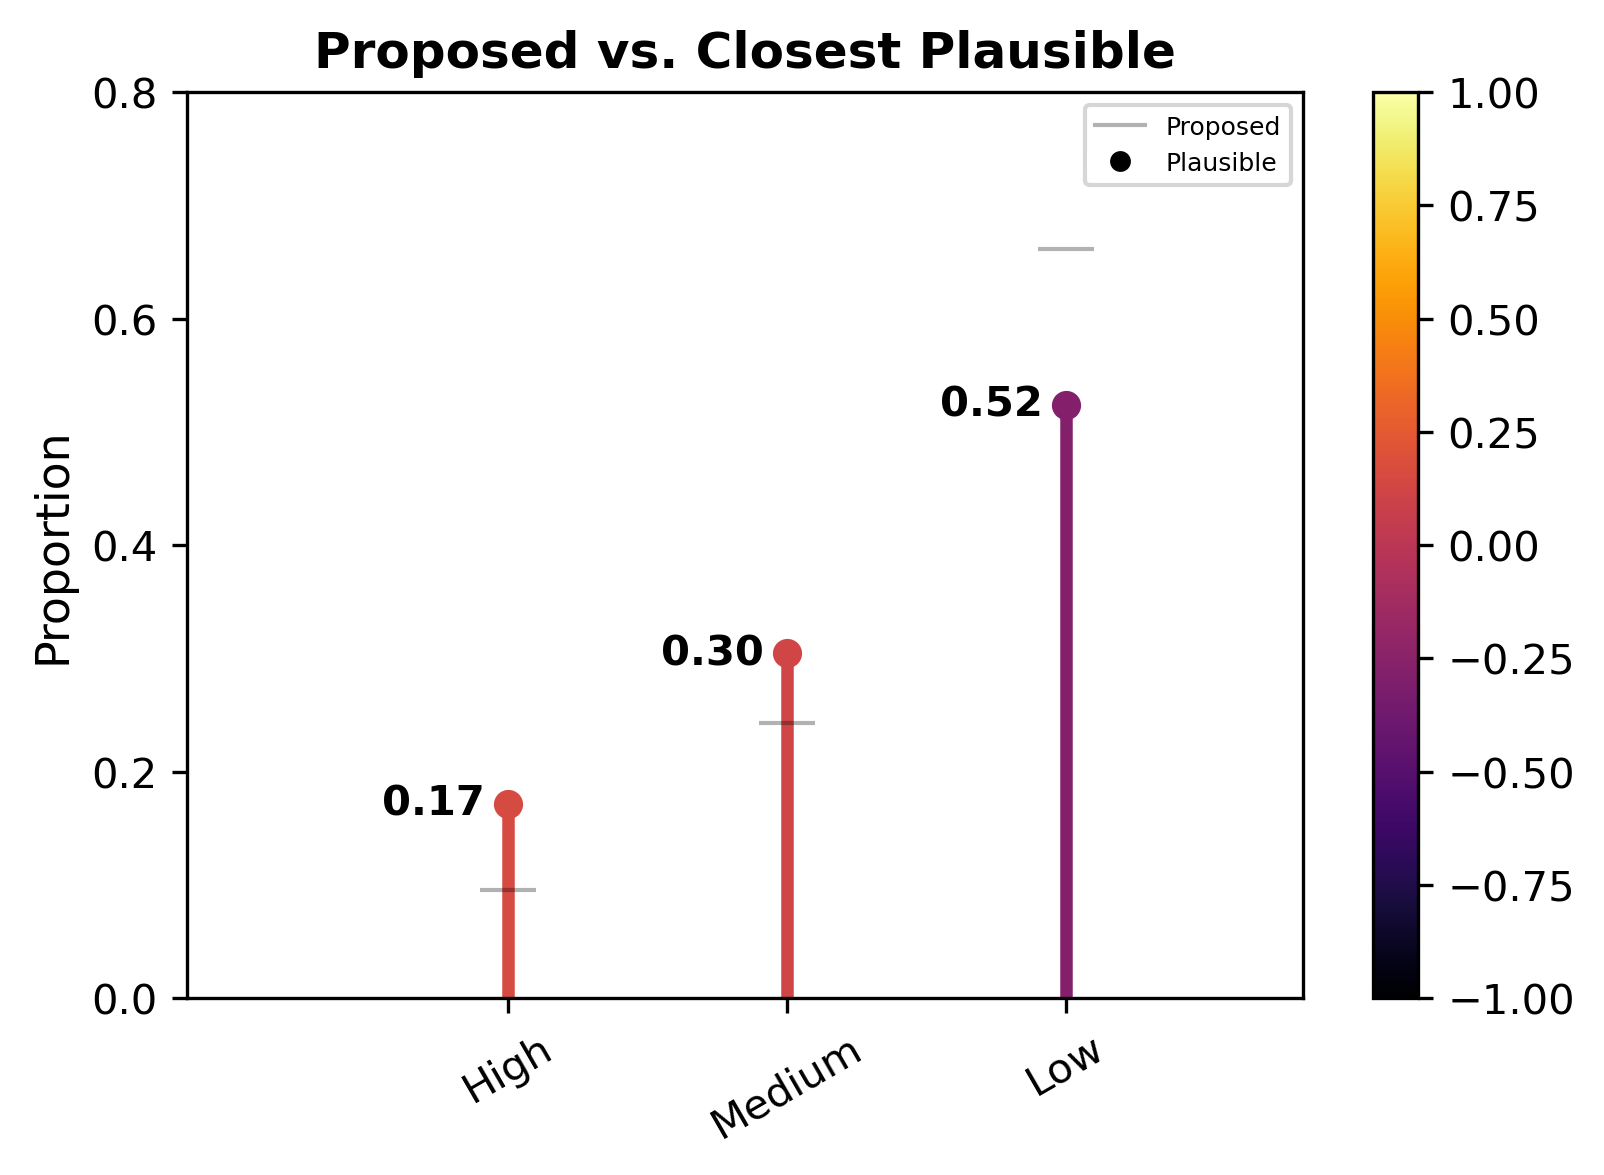

<Figure size 432x288 with 0 Axes>

In [6]:
#<=5 Priors Test
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(priors_le5_races,priors_le5_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]
AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")

q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_le5priors_white_dist.pdf")

Null hypothesis (proposed distribution): [0.29844961240310075, 0.3643410852713178, 0.3372093023255814]

Proposed distribution rejected at alpha = 0.05. Kardis = 3.77383825466191e-40.
Any plausible distribution must boost probability over the given distribution by 1.3249110488038e+38, and will therefore have a minimum probability of 1.23773745028779e-8.
Closest plausible distribution: [0.4273886512543863, 0.36044358247611225, 0.2121677662695014]


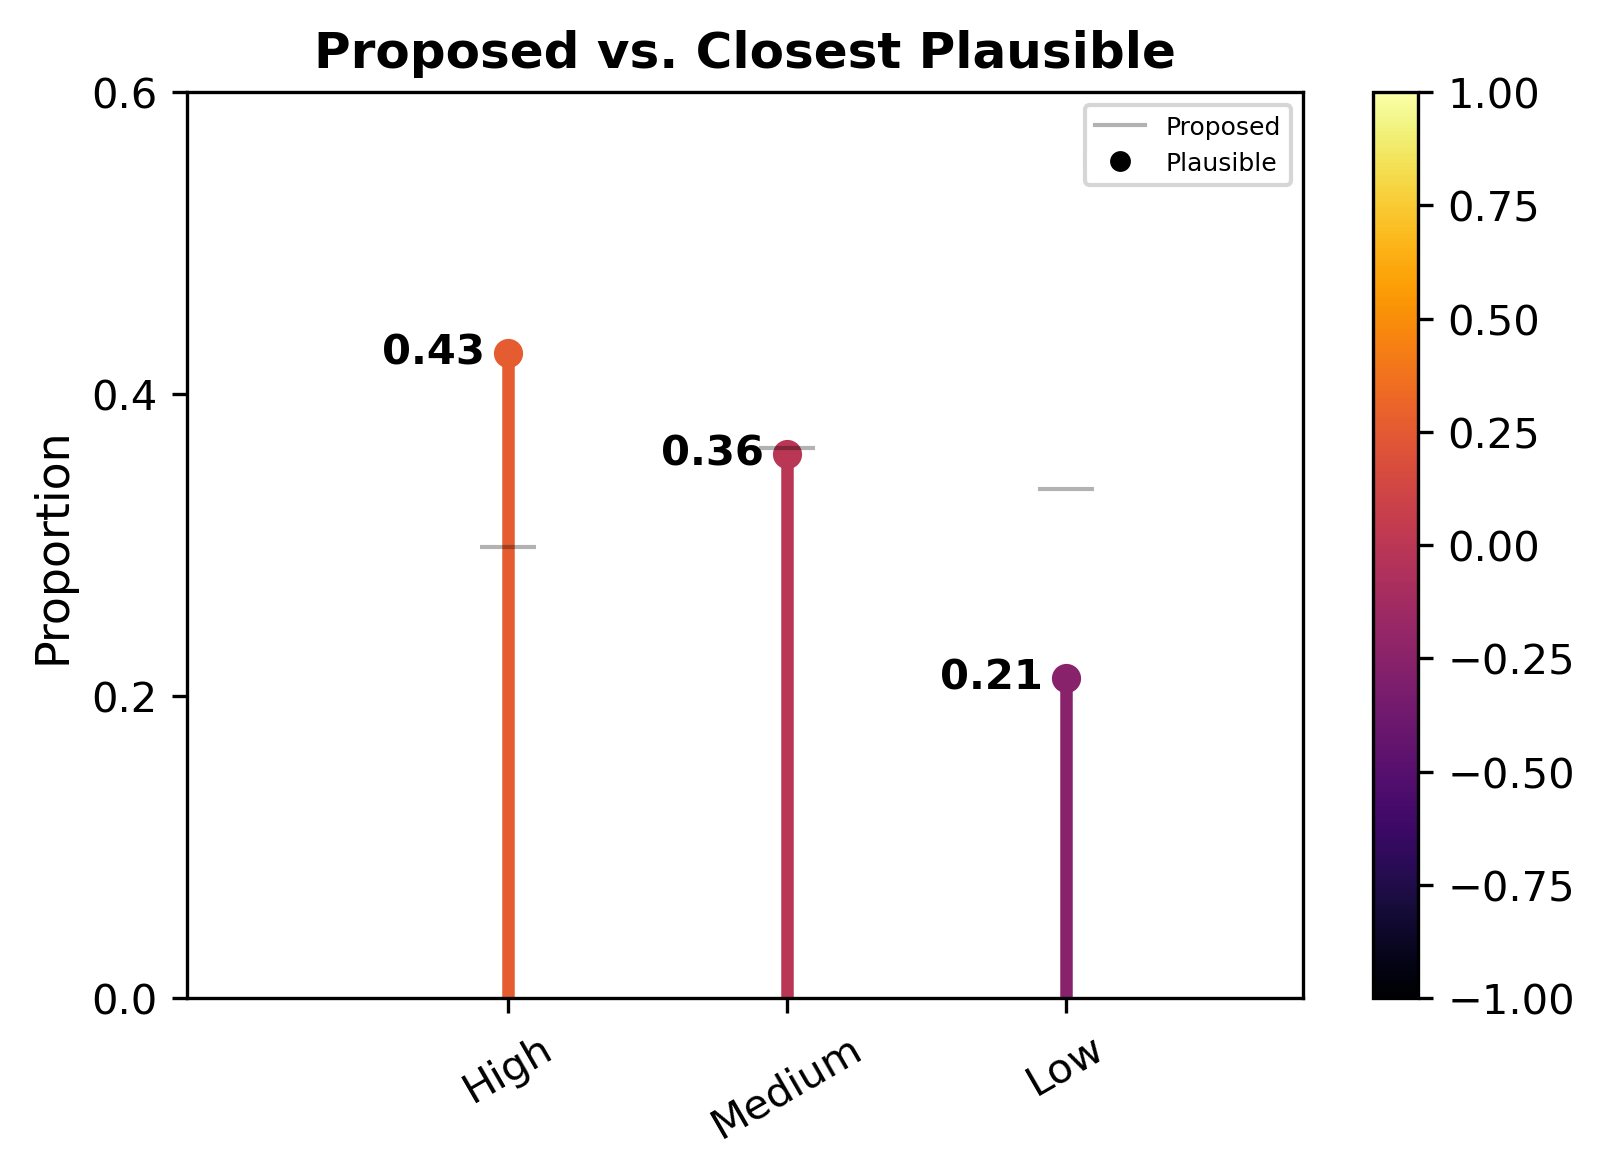

<Figure size 432x288 with 0 Axes>

In [7]:
#>5 Priors test
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(priors_gt5_races,priors_gt5_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]
AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")

q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_gt5priors_white_dist.pdf")